In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS

In [9]:
public_df = pd.read_csv("survey_results_public.csv", low_memory=False)
public_df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [10]:
data_df = public_df[['Employment','LanguageWorkedWith','YearsCodingProf','DevType','CompanySize','OpenSource','Country','FormalEducation','ConvertedSalary']]
data_df.head()

,Employment,LanguageWorkedWith,YearsCodingProf,DevType,CompanySize,OpenSource,Country,FormalEducation,ConvertedSalary
0,Employed part-time,JavaScript;Python;HTML;CSS,3-5 years,Full-stack developer,20 to 99 employees,No,Kenya,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN
1,Employed full-time,JavaScript;Python;Bash/Shell,18-20 years,Database administrator;DevOps specialist;Full-...,"10,000 or more employees",Yes,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",70841.0
2,Employed full-time,NaN,6-8 years,Engineering manager;Full-stack developer,20 to 99 employees,Yes,United States,Associate degree,NaN
3,Employed full-time,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,12-14 years,Full-stack developer,100 to 499 employees,No,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN
4,Employed full-time,C;C++;Java;Matlab;R;SQL;Bash/Shell,0-2 years,Data or business analyst;Desktop or enterprise...,"10,000 or more employees",No,South Africa,Some college/university study without earning ...,21426.0


## Focus on Employed

In [11]:
data_df['Employment'].unique()

array(['Employed part-time', 'Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Not employed, but looking for work', nan, 'Retired'], dtype=object)

- 'Employed full-time'
- 'Independent contractor, freelancer, or self-employed'

In [12]:
data_df = data_df[(data_df['Employment'] == 'Employed full-time') | (data_df['Employment'] == 'Independent contractor, freelancer, or self-employed')]
data_df.head()

,Employment,LanguageWorkedWith,YearsCodingProf,DevType,CompanySize,OpenSource,Country,FormalEducation,ConvertedSalary
1,Employed full-time,JavaScript;Python;Bash/Shell,18-20 years,Database administrator;DevOps specialist;Full-...,"10,000 or more employees",Yes,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",70841.0
2,Employed full-time,NaN,6-8 years,Engineering manager;Full-stack developer,20 to 99 employees,Yes,United States,Associate degree,NaN
3,Employed full-time,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,12-14 years,Full-stack developer,100 to 499 employees,No,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN
4,Employed full-time,C;C++;Java;Matlab;R;SQL;Bash/Shell,0-2 years,Data or business analyst;Desktop or enterprise...,"10,000 or more employees",No,South Africa,Some college/university study without earning ...,21426.0
5,Employed full-time,Java;JavaScript;Python;TypeScript;HTML;CSS,3-5 years,Back-end developer;Database administrator;Fron...,10 to 19 employees,No,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",41671.0


In [13]:
data_df.shape

(79777, 9)

## ConvertedSalary： 
- Fillna 
- Select values more than 0 
- Distribution
- Divide into 3 classes

In [14]:
data_df['ConvertedSalary'] = data_df['ConvertedSalary'].fillna(0)
data_df = data_df[data_df['ConvertedSalary'] > 0]
data_df.head()

,Employment,LanguageWorkedWith,YearsCodingProf,DevType,CompanySize,OpenSource,Country,FormalEducation,ConvertedSalary
1,Employed full-time,JavaScript;Python;Bash/Shell,18-20 years,Database administrator;DevOps specialist;Full-...,"10,000 or more employees",Yes,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",70841.0
4,Employed full-time,C;C++;Java;Matlab;R;SQL;Bash/Shell,0-2 years,Data or business analyst;Desktop or enterprise...,"10,000 or more employees",No,South Africa,Some college/university study without earning ...,21426.0
5,Employed full-time,Java;JavaScript;Python;TypeScript;HTML;CSS,3-5 years,Back-end developer;Database administrator;Fron...,10 to 19 employees,No,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",41671.0
6,Employed full-time,JavaScript;HTML;CSS,0-2 years,Back-end developer;Front-end developer;Full-st...,"10,000 or more employees",Yes,United States,Some college/university study without earning ...,120000.0
8,Employed full-time,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,21-23 years,"Back-end developer;C-suite executive (CEO, CTO...",100 to 499 employees,Yes,United States,Some college/university study without earning ...,250000.0


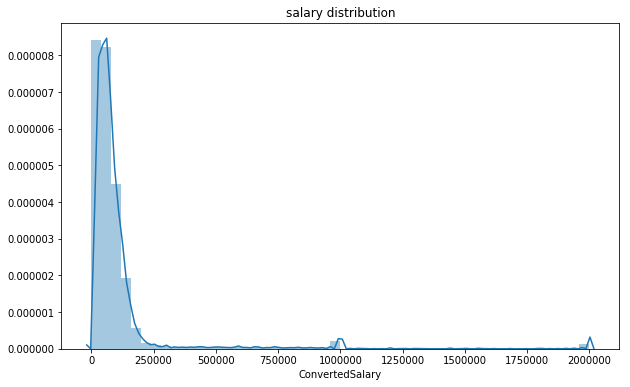

In [15]:
plt.figure(figsize=(10, 6))
sns.distplot(data_df['ConvertedSalary'])
plt.title('salary distribution')
plt.show()

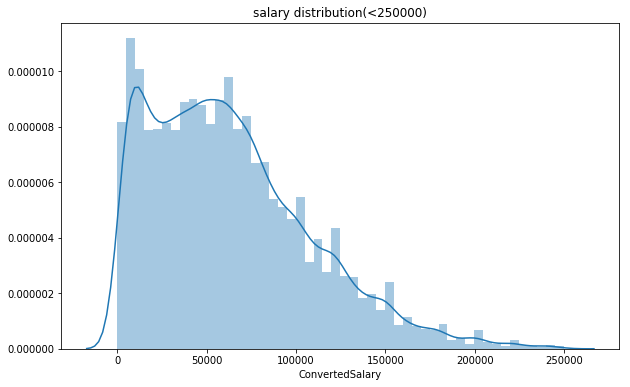

In [16]:
plt.figure(figsize=(10, 6))
sns.distplot(data_df['ConvertedSalary'][data_df['ConvertedSalary']<250000])
plt.title('salary distribution(<250000)')
plt.show()

In [17]:
def helper(x):
    if x <= 60000:
        return "LOW"
    elif x > 160000:
        return "HIGH"
    else:
        return "MEDIUM"
data_df['Salary_3_class'] = data_df['ConvertedSalary'].apply(helper)

## Separate data set
- Separate data set into 4 pieces according to "Country": USA/Canada, India, China, Europe

### USA/Canada

In [18]:
data_US_CA_df = data_df[(data_df['Country'] == 'United States') | (data_df['Country'] == 'Canada')]
data_US_CA_df.head()

,Employment,LanguageWorkedWith,YearsCodingProf,DevType,CompanySize,OpenSource,Country,FormalEducation,ConvertedSalary,Salary_3_class
6,Employed full-time,JavaScript;HTML;CSS,0-2 years,Back-end developer;Front-end developer;Full-st...,"10,000 or more employees",Yes,United States,Some college/university study without earning ...,120000.0,MEDIUM
8,Employed full-time,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,21-23 years,"Back-end developer;C-suite executive (CEO, CTO...",100 to 499 employees,Yes,United States,Some college/university study without earning ...,250000.0,HIGH
23,Employed full-time,JavaScript;PHP;SQL;HTML;CSS;Bash/Shell,18-20 years,Back-end developer;Database administrator;DevO...,10 to 19 employees,No,United States,Some college/university study without earning ...,75000.0,MEDIUM
27,Employed full-time,C#;JavaScript;SQL;HTML;CSS,0-2 years,Back-end developer;Full-stack developer,100 to 499 employees,No,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",900000.0,HIGH
32,Employed full-time,Java;JavaScript;Objective-C;PHP;SQL;Swift;HTML...,0-2 years,Back-end developer;Designer;Front-end develope...,500 to 999 employees,No,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",44000.0,LOW


### India

In [19]:
data_India_df = data_df[data_df['Country'] == 'India']
data_India_df.head()

,Employment,LanguageWorkedWith,YearsCodingProf,DevType,CompanySize,OpenSource,Country,FormalEducation,ConvertedSalary,Salary_3_class
24,Employed full-time,C;C++;Java;JavaScript;SQL;Swift;Kotlin,3-5 years,Mobile developer,100 to 499 employees,No,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",10958.0,LOW
41,Employed full-time,PHP;HTML;CSS,0-2 years,Designer;Front-end developer,20 to 99 employees,No,India,Some college/university study without earning ...,123984.0,MEDIUM
45,Employed full-time,JavaScript;PHP;Python;SQL;HTML;CSS,3-5 years,Back-end developer;Desktop or enterprise appli...,100 to 499 employees,No,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",6576.0,LOW
93,Employed full-time,Objective-C;Swift,6-8 years,Engineering manager;Mobile developer,500 to 999 employees,Yes,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",34440.0,LOW
95,Employed full-time,Java;JavaScript;SQL,0-2 years,Back-end developer,100 to 499 employees,No,India,"Bachelor’s degree (BA, BS, B.Eng., etc.)",4128.0,LOW


In [20]:
data_China_df = data_df[data_df['Country'] == 'China']
data_China_df.head()

,Employment,LanguageWorkedWith,YearsCodingProf,DevType,CompanySize,OpenSource,Country,FormalEducation,ConvertedSalary,Salary_3_class
65,Employed full-time,C#;Python,0-2 years,Back-end developer;Database administrator;Fron...,"1,000 to 4,999 employees",Yes,China,"Bachelor’s degree (BA, BS, B.Eng., etc.)",19500.0,LOW
70,Employed full-time,Perl;R;SQL,3-5 years,Back-end developer;Full-stack developer;QA or ...,"10,000 or more employees",Yes,China,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",85708.0,MEDIUM
720,Employed full-time,C#;Java;JavaScript;Matlab;Python;SQL;HTML;CSS,3-5 years,Data or business analyst;Desktop or enterprise...,"1,000 to 4,999 employees",No,China,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",27120.0,LOW
1906,Employed full-time,C#;Java,9-11 years,Back-end developer;Designer,"10,000 or more employees",Yes,China,"Bachelor’s degree (BA, BS, B.Eng., etc.)",67320.0,MEDIUM
2017,Employed full-time,C#;JavaScript;TypeScript;HTML;CSS,3-5 years,Front-end developer,"10,000 or more employees",Yes,China,"Bachelor’s degree (BA, BS, B.Eng., etc.)",46750.0,LOW


### Europe countries: 

In [21]:
# https://pkgstore.datahub.io/opendatafortaxjustice/listofeucountries/listofeucountries_csv/data/5ab24e62d2ad8f06b59a0e7ffd7cb556/listofeucountries_csv.csv
Europe_countries_df = pd.read_csv("listofeucountries_csv.csv").rename(columns={"x": "EuropeCountryName"})
Europe_countries_set = set(Europe_countries_df['EuropeCountryName'].unique())
data_Europe_df = data_df[data_df['Country'] == data_df['Country'].map(lambda x: x if x in Europe_countries_set else None)]
data_Europe_df.head()

,Employment,LanguageWorkedWith,YearsCodingProf,DevType,CompanySize,OpenSource,Country,FormalEducation,ConvertedSalary,Salary_3_class
1,Employed full-time,JavaScript;Python;Bash/Shell,18-20 years,Database administrator;DevOps specialist;Full-...,"10,000 or more employees",Yes,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",70841.0,MEDIUM
5,Employed full-time,Java;JavaScript;Python;TypeScript;HTML;CSS,3-5 years,Back-end developer;Database administrator;Fron...,10 to 19 employees,No,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",41671.0,LOW
17,Employed full-time,C#;SQL;HTML;CSS;Bash/Shell,0-2 years,Back-end developer,10 to 19 employees,No,Sweden,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",47904.0,LOW
22,Employed full-time,C#;JavaScript;PHP;SQL;HTML;CSS,6-8 years,Back-end developer;Database administrator;Desi...,20 to 99 employees,No,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",420.0,LOW
25,Employed full-time,Java;JavaScript;PHP;SQL;TypeScript;HTML;CSS,9-11 years,Full-stack developer,20 to 99 employees,Yes,Greece,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",51408.0,LOW


### Other countries

In [22]:
data_Others_df = data_df[(data_df['Country'] != 'United States')&(data_df['Country'] != 'Canada')&(data_df['Country'] != 'China')&(data_df['Country'] != 'India')&(data_df['Country'] != data_df['Country'].map(lambda x: x if x in Europe_countries_set else None))]
data_Others_df.head()

,Employment,LanguageWorkedWith,YearsCodingProf,DevType,CompanySize,OpenSource,Country,FormalEducation,ConvertedSalary,Salary_3_class
4,Employed full-time,C;C++;Java;Matlab;R;SQL;Bash/Shell,0-2 years,Data or business analyst;Desktop or enterprise...,"10,000 or more employees",No,South Africa,Some college/university study without earning ...,21426.0,LOW
20,Employed full-time,C;C++;Go;Python;SQL;Swift,12-14 years,Database administrator;Full-stack developer;Mo...,"1,000 to 4,999 employees",Yes,Australia,"Bachelor’s degree (BA, BS, B.Eng., etc.)",95968.0,MEDIUM
42,Employed full-time,SQL,24-26 years,Full-stack developer,"1,000 to 4,999 employees",No,Russian Federation,Some college/university study without earning ...,21228.0,LOW
76,Employed full-time,Java;JavaScript;PHP;SQL;TypeScript;HTML;CSS,12-14 years,Back-end developer;Front-end developer;Full-st...,"1,000 to 4,999 employees",No,Colombia,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",64116.0,MEDIUM
80,Employed full-time,JavaScript;Ruby;SQL;HTML;CSS,0-2 years,Back-end developer;Embedded applications or de...,Fewer than 10 employees,No,Japan,"Bachelor’s degree (BA, BS, B.Eng., etc.)",32412.0,LOW


In [23]:
data_US_CA_df.shape, data_India_df.shape, data_China_df.shape, data_Europe_df.shape, data_Others_df.shape

((13923, 10), (3686, 10), (236, 10), (15138, 10), (10218, 10))

In [24]:
data_US_CA_df.shape[0] + data_India_df.shape[0] + data_China_df.shape[0] + data_Europe_df.shape[0] + data_Others_df.shape[0] == data_df.shape[0]

True

## Assign 3 salary classes(HIGH/MEDIUM/LOW) in 4 types of regions

### Distribution of salary

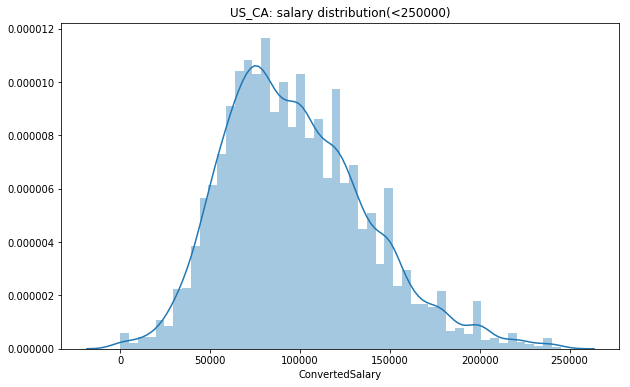

In [25]:
plt.figure(figsize=(10, 6))
sns.distplot(data_US_CA_df['ConvertedSalary'][data_US_CA_df['ConvertedSalary']<250000])
plt.title('US_CA: salary distribution(<250000)')
plt.show()

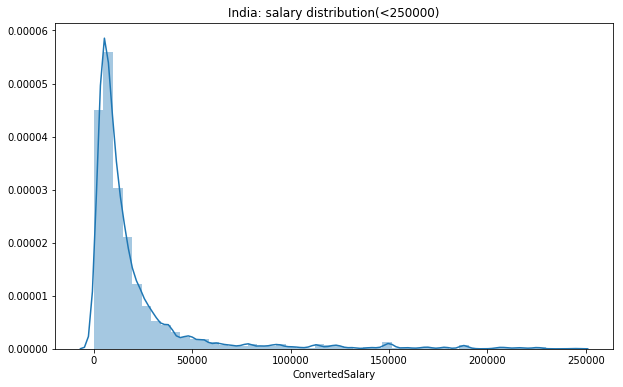

In [26]:
plt.figure(figsize=(10, 6))
sns.distplot(data_India_df['ConvertedSalary'][data_India_df['ConvertedSalary']<250000])
plt.title('India: salary distribution(<250000)')
plt.show()

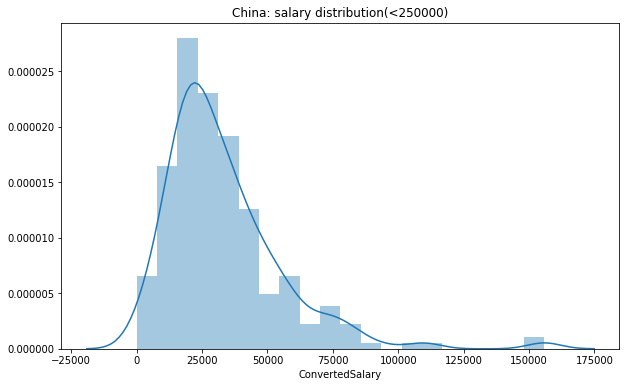

In [27]:
plt.figure(figsize=(10, 6))
sns.distplot(data_China_df['ConvertedSalary'][data_China_df['ConvertedSalary']<250000])
plt.title('China: salary distribution(<250000)')
plt.show()

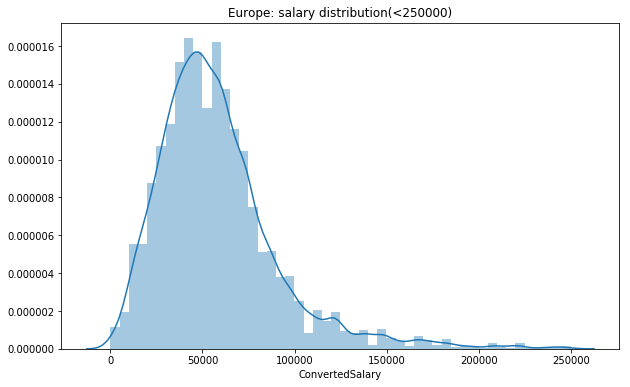

In [28]:
plt.figure(figsize=(10, 6))
sns.distplot(data_Europe_df['ConvertedSalary'][data_Europe_df['ConvertedSalary']<250000])
plt.title('Europe: salary distribution(<250000)')
plt.show()

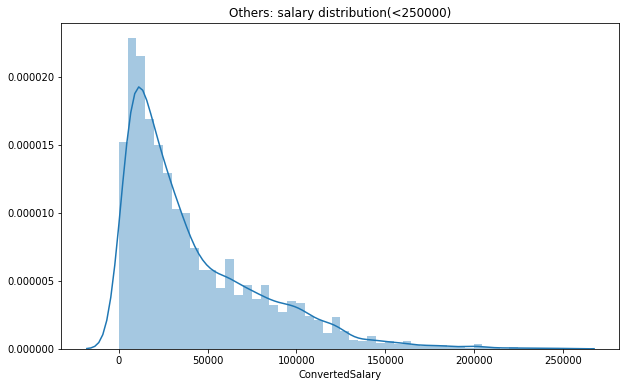

In [29]:
plt.figure(figsize=(10, 6))
sns.distplot(data_Others_df['ConvertedSalary'][data_Others_df['ConvertedSalary']<250000])
plt.title('Others: salary distribution(<250000)')
plt.show()

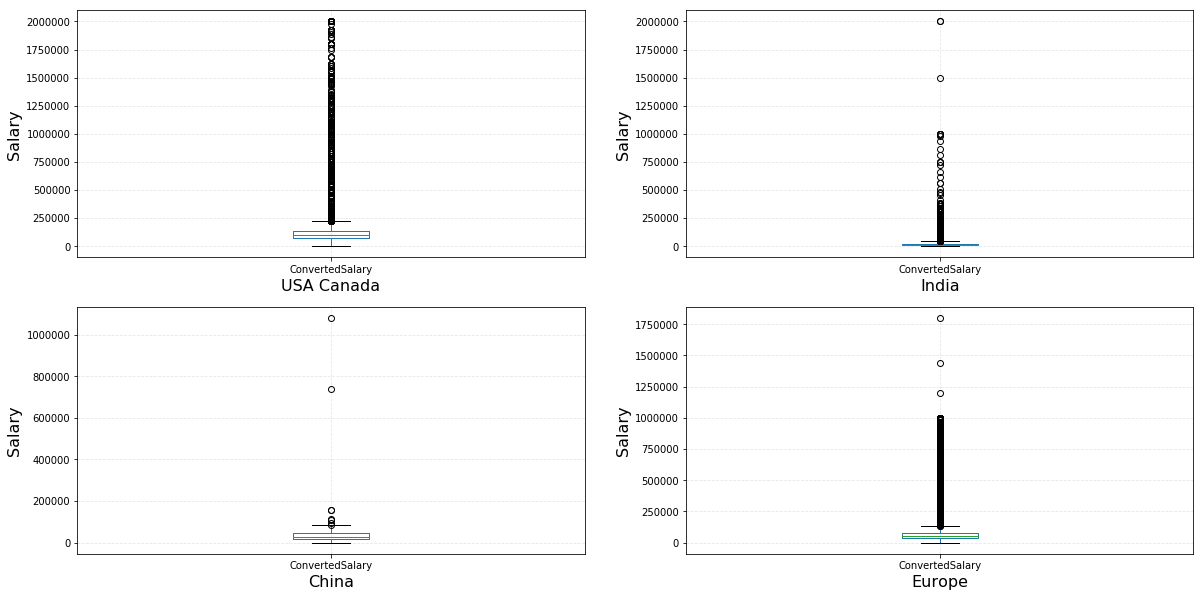

In [30]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
data_US_CA_df['ConvertedSalary'].plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.xlabel('USA Canada', fontsize = 16)
plt.ylabel('Salary', fontsize = 16)

plt.subplot(222)
data_India_df['ConvertedSalary'].plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.xlabel('India', fontsize = 16)
plt.ylabel('Salary', fontsize = 16)

plt.subplot(223)
data_China_df['ConvertedSalary'].plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.xlabel('China', fontsize = 16)
plt.ylabel('Salary', fontsize = 16)

plt.subplot(224)
data_Europe_df['ConvertedSalary'].plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.xlabel('Europe', fontsize = 16)
plt.ylabel('Salary', fontsize = 16)

plt.show()

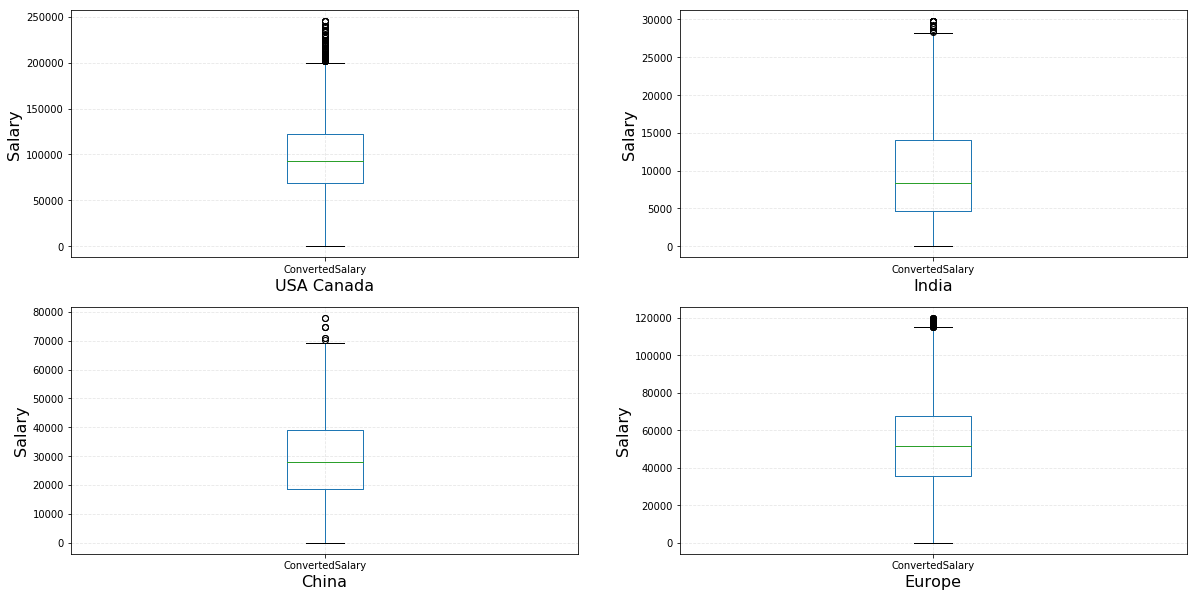

In [31]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
data_US_CA_df['ConvertedSalary'][data_US_CA_df['ConvertedSalary']<250000].plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.xlabel('USA Canada', fontsize = 16)
plt.ylabel('Salary', fontsize = 16)

plt.subplot(222)
data_India_df['ConvertedSalary'][data_India_df['ConvertedSalary']<30000].plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.xlabel('India', fontsize = 16)
plt.ylabel('Salary', fontsize = 16)

plt.subplot(223)
data_China_df['ConvertedSalary'][data_China_df['ConvertedSalary']<80000].plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.xlabel('China', fontsize = 16)
plt.ylabel('Salary', fontsize = 16)

plt.subplot(224)
data_Europe_df['ConvertedSalary'][data_Europe_df['ConvertedSalary']<120000].plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.xlabel('Europe', fontsize = 16)
plt.ylabel('Salary', fontsize = 16)

plt.show()

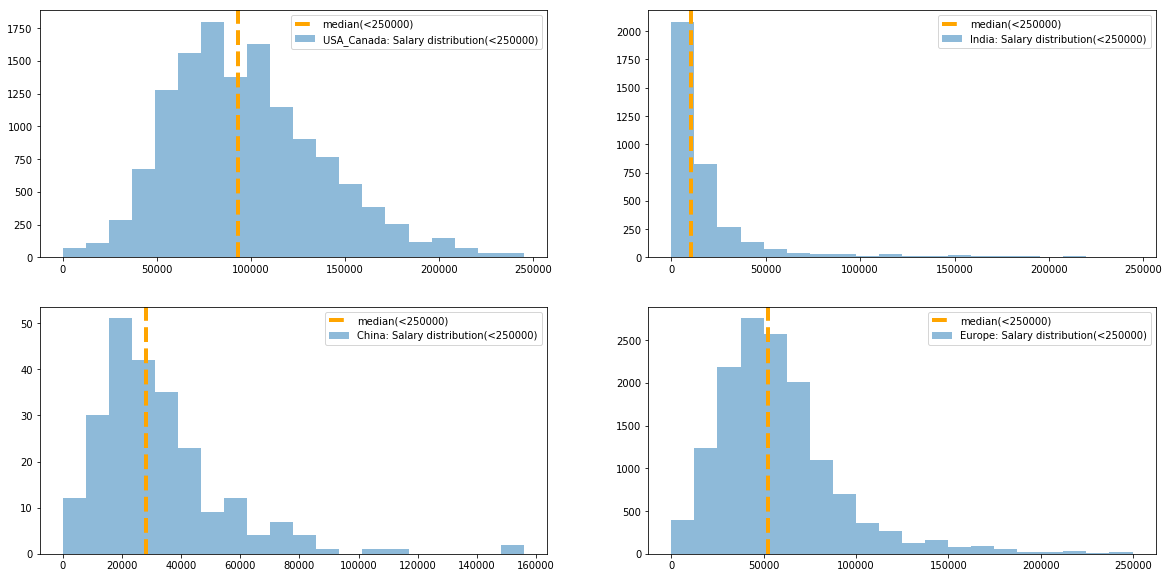

In [32]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.hist(data_US_CA_df['ConvertedSalary'][data_US_CA_df['ConvertedSalary']<250000],
        bins = 20,
        alpha = 0.5, 
        label = "USA_Canada: Salary distribution(<250000)")
plt.axvline(data_US_CA_df[(data_US_CA_df['ConvertedSalary']<250000)].ConvertedSalary.median(), color='orange', linestyle='dashed', linewidth=4, label='median(<250000)')
plt.legend(loc = 'upper right')

plt.subplot(222)
plt.hist(data_India_df['ConvertedSalary'][data_India_df['ConvertedSalary']<250000],
        bins = 20,
        alpha = 0.5, 
        label = "India: Salary distribution(<250000)")
plt.axvline(data_India_df[(data_India_df['ConvertedSalary']<250000)].ConvertedSalary.median(), color='orange', linestyle='dashed', linewidth=4, label='median(<250000)')
plt.legend(loc = 'upper right')

plt.subplot(223)
plt.hist(data_China_df['ConvertedSalary'][data_China_df['ConvertedSalary']<250000],
        bins = 20,
        alpha = 0.5, 
        label = "China: Salary distribution(<250000)")
plt.axvline(data_China_df[(data_China_df['ConvertedSalary']<250000)].ConvertedSalary.median(), color='orange', linestyle='dashed', linewidth=4, label='median(<250000)')
plt.legend(loc = 'upper right')

plt.subplot(224)
plt.hist(data_Europe_df['ConvertedSalary'][data_Europe_df['ConvertedSalary']<250000],
        bins = 20,
        alpha = 0.5, 
        label = "Europe: Salary distribution(<250000)")
plt.axvline(data_Europe_df[(data_Europe_df['ConvertedSalary']<250000)].ConvertedSalary.median(), color='orange', linestyle='dashed', linewidth=4, label='median(<250000)')
plt.legend(loc = 'upper right')

plt.show()

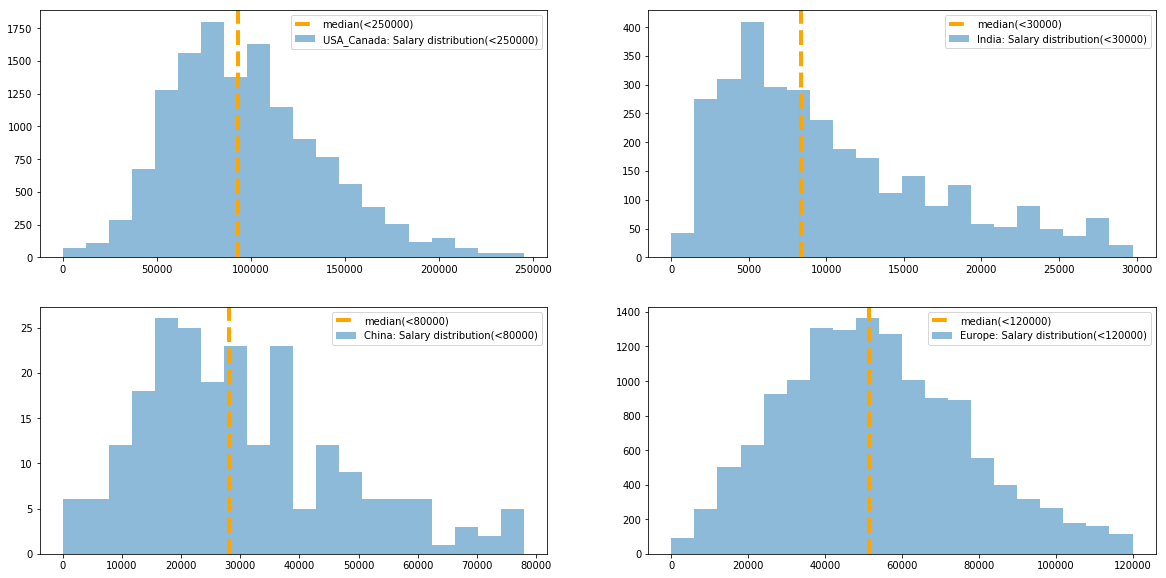

In [33]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.hist(data_US_CA_df['ConvertedSalary'][data_US_CA_df['ConvertedSalary']<250000],
        bins = 20,
        alpha = 0.5, 
        label = "USA_Canada: Salary distribution(<250000)")
plt.axvline(data_US_CA_df[(data_US_CA_df['ConvertedSalary']<250000)].ConvertedSalary.median(), color='orange', linestyle='dashed', linewidth=4, label='median(<250000)')
plt.legend(loc = 'upper right')

plt.subplot(222)
plt.hist(data_India_df['ConvertedSalary'][data_India_df['ConvertedSalary']<30000],
        bins = 20,
        alpha = 0.5, 
        label = "India: Salary distribution(<30000)")
plt.axvline(data_India_df[(data_India_df['ConvertedSalary']<30000)].ConvertedSalary.median(), color='orange', linestyle='dashed', linewidth=4, label='median(<30000)')
plt.legend(loc = 'upper right')

plt.subplot(223)
plt.hist(data_China_df['ConvertedSalary'][data_China_df['ConvertedSalary']<80000],
        bins = 20,
        alpha = 0.5, 
        label = "China: Salary distribution(<80000)")
plt.axvline(data_China_df[(data_China_df['ConvertedSalary']<80000)].ConvertedSalary.median(), color='orange', linestyle='dashed', linewidth=4, label='median(<80000)')
plt.legend(loc = 'upper right')

plt.subplot(224)
plt.hist(data_Europe_df['ConvertedSalary'][data_Europe_df['ConvertedSalary']<120000],
        bins = 20,
        alpha = 0.5, 
        label = "Europe: Salary distribution(<120000)")
plt.axvline(data_Europe_df[(data_Europe_df['ConvertedSalary']<120000)].ConvertedSalary.median(), color='orange', linestyle='dashed', linewidth=4, label='median(<120000)')
plt.legend(loc = 'upper right')

plt.show()

#### US_CA

In [34]:
def helper(x):
    if x <= 50000:
        return "LOW"
    elif x > 140000:
        return "HIGH"
    else:
        return "MEDIUM"
data_US_CA_df['Salary_3_class'] = data_US_CA_df['ConvertedSalary'].apply(helper)

/Users/zhehaoguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### India

In [35]:
def helper(x):
    if x <= 5000:
        return "LOW"
    elif x > 15000:
        return "HIGH"
    else:
        return "MEDIUM"
data_India_df['Salary_3_class'] = data_India_df['ConvertedSalary'].apply(helper)

/Users/zhehaoguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### China

In [36]:
def helper(x):
    if x <= 20000:
        return "LOW"
    elif x > 40000:
        return "HIGH"
    else:
        return "MEDIUM"
data_China_df['Salary_3_class'] = data_China_df['ConvertedSalary'].apply(helper)

/Users/zhehaoguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Europe

In [37]:
def helper(x):
    if x <= 40000:
        return "LOW"
    elif x > 70000:
        return "HIGH"
    else:
        return "MEDIUM"
data_Europe_df['Salary_3_class'] = data_Europe_df['ConvertedSalary'].apply(helper)

/Users/zhehaoguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Employment

In [38]:
def employment(data_df):
    median = data_df.groupby('Employment',as_index=False).median()
    mean = data_df.groupby('Employment',as_index=False).mean()

    fig = plt.figure(figsize=(20, 12))

    plt.subplot(221)
    x, y = median['Employment'], median['ConvertedSalary']
    plt.bar(x, y)
    for a,b in zip(x, y):
        plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
    plt.ylabel('mean salary')
    plt.xlabel('Employment type')


    plt.subplot(222)
    x, y = mean['Employment'], mean['ConvertedSalary']
    plt.bar(x, y)
    for a,b in zip(x, y):
        plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
    plt.ylabel('mean salary')
    plt.xlabel('Employment type')    
    plt.show()

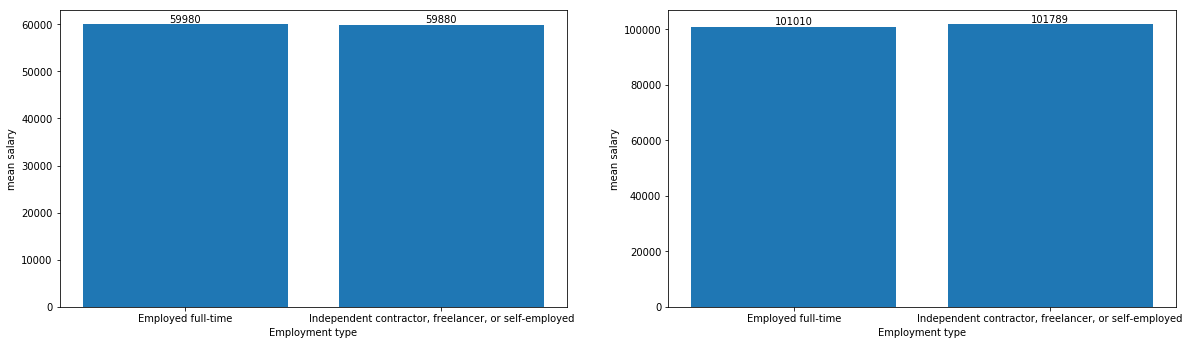

In [39]:
employment(data_df)

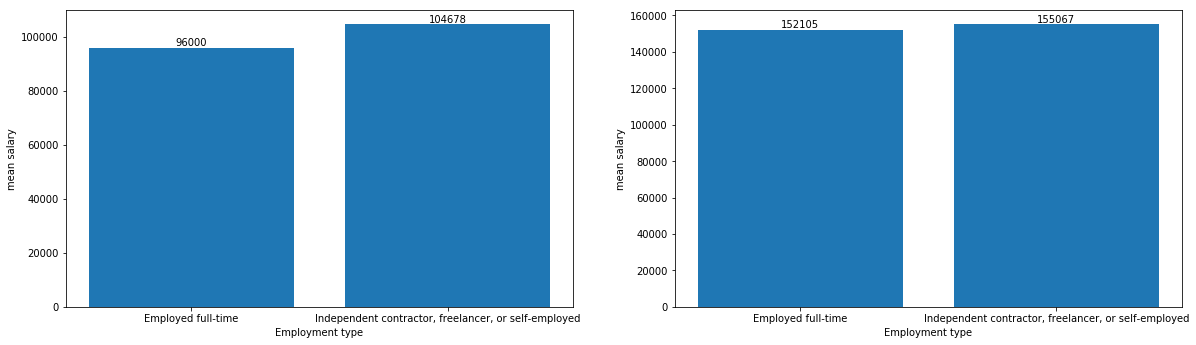

In [40]:
employment(data_US_CA_df)

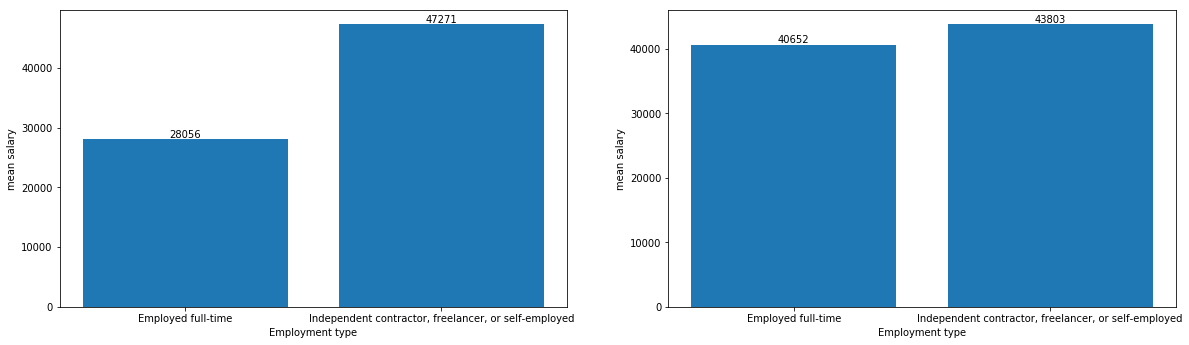

In [41]:
employment(data_China_df)

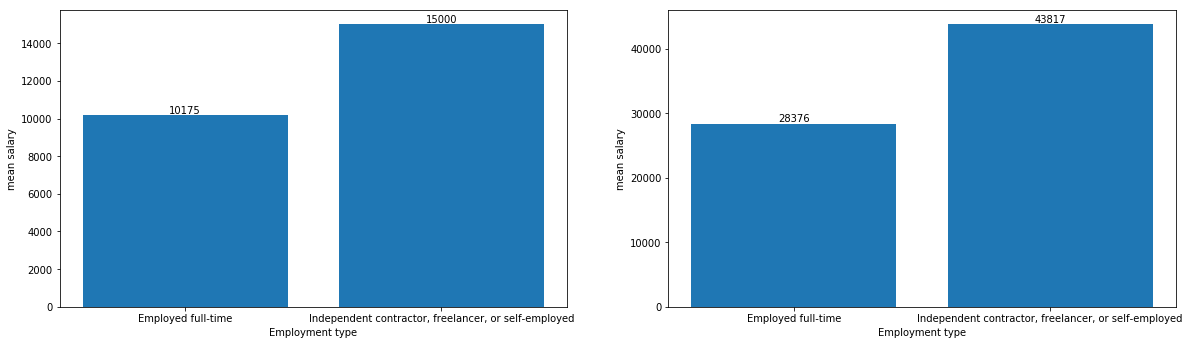

In [42]:
employment(data_India_df)

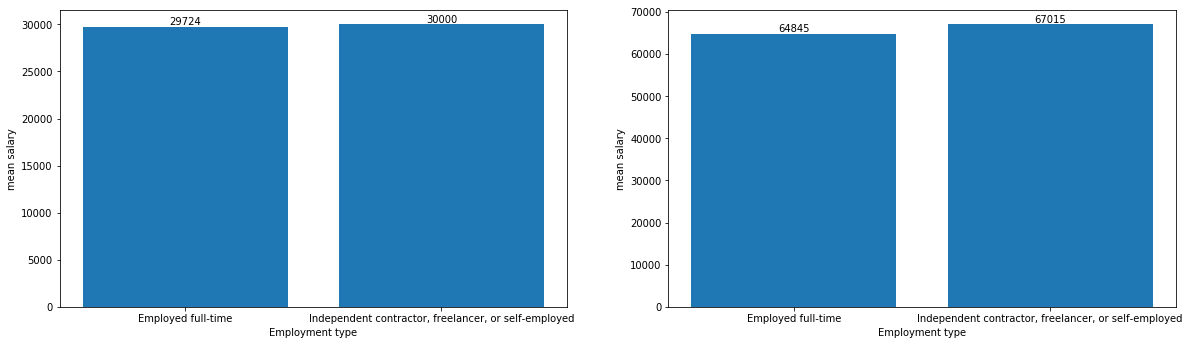

In [43]:
employment(data_Others_df)

## YearsCodingProf	

In [44]:
data_df['YearsCodingProf'].unique()

array(['18-20 years', '0-2 years', '3-5 years', '21-23 years',
       '12-14 years', '6-8 years', '9-11 years', '24-26 years',
       '15-17 years', '30 or more years', '27-29 years', nan],
      dtype=object)

In [45]:
def helper(x):
    if x == '0-2 years':
        return 0
    if x == '3-5 years':
        return 1
    if x == '6-8 years':
        return 2
    if x == '9-11 years':
        return 3
    if x == '12-14 years':
        return 4
    if x == '15-17 years':
        return 5
    if x == '18-20 years':
        return 6
    if x == '21-23 years':
        return 7
    if x == '24-26 years':
        return 8
    if x == '27-29 years':
        return 9
    if x == '30 or more years':
        return 10

salary_class_cnt = data_df.groupby(['YearsCodingProf','Salary_3_class']).count().reset_index()[['ConvertedSalary','Salary_3_class','YearsCodingProf']]
salary_class_cnt['YearsLevel'] = salary_class_cnt['YearsCodingProf'].apply(helper)
salary_class_cnt = salary_class_cnt.sort_values(by = 'YearsLevel')
high = salary_class_cnt[salary_class_cnt['Salary_3_class'] == 'HIGH']['ConvertedSalary'].values
medium = salary_class_cnt[salary_class_cnt['Salary_3_class'] == 'MEDIUM']['ConvertedSalary'].values
low = salary_class_cnt[salary_class_cnt['Salary_3_class'] == 'LOW']['ConvertedSalary'].values

In [46]:
YearsCodingProf_df = data_df.groupby('YearsCodingProf').median().reset_index()

YearsCodingProf_df['YearsLevel'] = YearsCodingProf_df['YearsCodingProf'].apply(helper)
YearsCodingProf_df = YearsCodingProf_df.sort_values(by = 'YearsLevel')
YearsCodingProf_df['HIGH'] = high
YearsCodingProf_df['MEDIUM'] = medium
YearsCodingProf_df['LOW'] = low
YearsCodingProf_df['HIGH_rate'] = YearsCodingProf_df.apply(lambda x: x['HIGH']/(x['HIGH']+x['MEDIUM']+x['LOW']), axis = 1)
YearsCodingProf_df['MEDIUM_rate'] = YearsCodingProf_df.apply(lambda x: x['MEDIUM']/(x['HIGH']+x['MEDIUM']+x['LOW']), axis = 1)
YearsCodingProf_df['LOW_rate'] = YearsCodingProf_df.apply(lambda x: x['LOW']/(x['HIGH']+x['MEDIUM']+x['LOW']), axis = 1)
YearsCodingProf_df

,YearsCodingProf,ConvertedSalary,YearsLevel,HIGH,MEDIUM,LOW,HIGH_rate,MEDIUM_rate,LOW_rate
0,0-2 years,33007.0,0,369,1861,6964,0.040135,0.202415,0.757451
7,3-5 years,48912.0,1,662,4104,7537,0.053808,0.333577,0.612615
9,6-8 years,62380.0,2,509,3244,3444,0.070724,0.450743,0.478533
10,9-11 years,73576.0,3,450,2750,1881,0.088565,0.541232,0.370203
1,12-14 years,84534.0,4,317,1671,833,0.112371,0.592343,0.295285
2,15-17 years,92000.0,5,272,1276,471,0.134720,0.631996,0.233284
3,18-20 years,98890.0,6,292,1254,351,0.153927,0.661044,0.185029
4,21-23 years,109066.5,7,148,615,121,0.167421,0.695701,0.136878
5,24-26 years,110149.0,8,105,371,79,0.189189,0.668468,0.142342
6,27-29 years,112000.0,9,73,208,38,0.228840,0.652038,0.119122


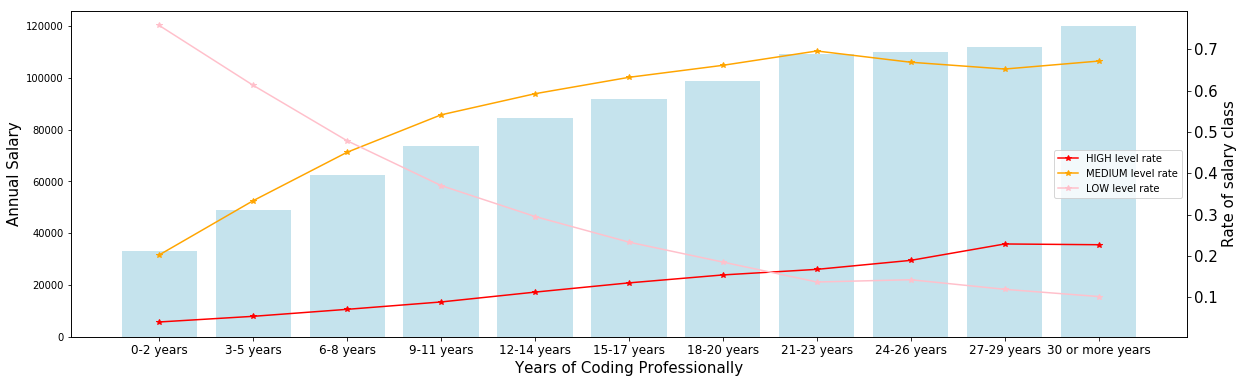

In [47]:
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(111)
ax1.bar(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['ConvertedSalary'],alpha=.7,color='lightblue')
ax1.set_ylabel('Annual Salary',fontsize='15') 
plt.yticks(fontsize=10)
plt.xticks(fontsize=12)
ax1.set_xlabel('Years of Coding Professionally',fontsize='15')


ax2 = ax1.twinx()
ax2.plot(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['HIGH_rate'], color='red', marker='*', label='HIGH level rate')
ax2.plot(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['MEDIUM_rate'],color='orange' , marker='*',label='MEDIUM level rate')
ax2.plot(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['LOW_rate'], color='pink', marker='*', label='LOW level rate')
plt.legend()

ax2.set_ylabel('Rate of salary class',fontsize='15')
plt.yticks(fontsize=15)

plt.show()

### US CA

In [48]:
def helper(x):
    if x == '0-2 years':
        return 0
    if x == '3-5 years':
        return 1
    if x == '6-8 years':
        return 2
    if x == '9-11 years':
        return 3
    if x == '12-14 years':
        return 4
    if x == '15-17 years':
        return 5
    if x == '18-20 years':
        return 6
    if x == '21-23 years':
        return 7
    if x == '24-26 years':
        return 8
    if x == '27-29 years':
        return 9
    if x == '30 or more years':
        return 10

salary_class_cnt = data_US_CA_df.groupby(['YearsCodingProf','Salary_3_class']).count().reset_index()[['ConvertedSalary','Salary_3_class','YearsCodingProf']]
salary_class_cnt['YearsLevel'] = salary_class_cnt['YearsCodingProf'].apply(helper)
salary_class_cnt = salary_class_cnt.sort_values(by = 'YearsLevel')
high = salary_class_cnt[salary_class_cnt['Salary_3_class'] == 'HIGH']['ConvertedSalary'].values
medium = salary_class_cnt[salary_class_cnt['Salary_3_class'] == 'MEDIUM']['ConvertedSalary'].values
low = salary_class_cnt[salary_class_cnt['Salary_3_class'] == 'LOW']['ConvertedSalary'].values


YearsCodingProf_df = data_US_CA_df.groupby('YearsCodingProf').median().reset_index()
YearsCodingProf_df['YearsLevel'] = YearsCodingProf_df['YearsCodingProf'].apply(helper)
YearsCodingProf_df = YearsCodingProf_df.sort_values(by = 'YearsLevel')
YearsCodingProf_df['HIGH'] = high
YearsCodingProf_df['MEDIUM'] = medium
YearsCodingProf_df['LOW'] = low
YearsCodingProf_df['HIGH_rate'] = YearsCodingProf_df.apply(lambda x: x['HIGH']/(x['HIGH']+x['MEDIUM']+x['LOW']), axis = 1)
YearsCodingProf_df['MEDIUM_rate'] = YearsCodingProf_df.apply(lambda x: x['MEDIUM']/(x['HIGH']+x['MEDIUM']+x['LOW']), axis = 1)
YearsCodingProf_df['LOW_rate'] = YearsCodingProf_df.apply(lambda x: x['LOW']/(x['HIGH']+x['MEDIUM']+x['LOW']), axis = 1)
YearsCodingProf_df

,YearsCodingProf,ConvertedSalary,YearsLevel,HIGH,MEDIUM,LOW,HIGH_rate,MEDIUM_rate,LOW_rate
0,0-2 years,68000.0,0,166,1759,639,0.064743,0.686037,0.249220
7,3-5 years,81200.0,1,379,2790,372,0.107032,0.787913,0.105055
9,6-8 years,100000.0,2,343,1698,109,0.159535,0.789767,0.050698
10,9-11 years,110000.0,3,367,1216,69,0.222155,0.736077,0.041768
1,12-14 years,115000.0,4,282,707,32,0.276200,0.692458,0.031342
2,15-17 years,120000.0,5,258,524,21,0.321295,0.652553,0.026152
3,18-20 years,120000.0,6,279,556,18,0.327081,0.651817,0.021102
4,21-23 years,130000.0,7,159,264,5,0.371495,0.616822,0.011682
5,24-26 years,126031.0,8,106,171,7,0.373239,0.602113,0.024648
6,27-29 years,139500.0,9,74,82,2,0.468354,0.518987,0.012658


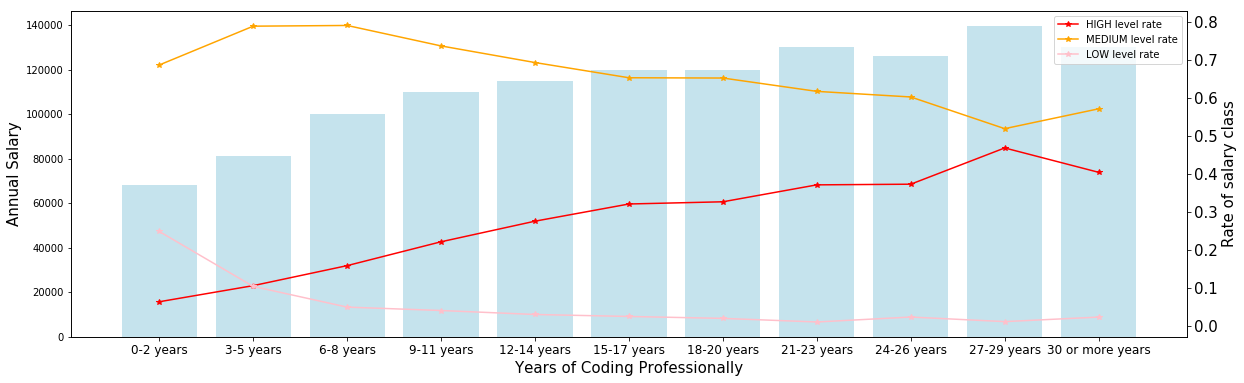

In [49]:
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(111)
ax1.bar(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['ConvertedSalary'],alpha=.7,color='lightblue')
ax1.set_ylabel('Annual Salary',fontsize='15') 
plt.yticks(fontsize=10)
plt.xticks(fontsize=12)
ax1.set_xlabel('Years of Coding Professionally',fontsize='15')


ax2 = ax1.twinx()
ax2.plot(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['HIGH_rate'], color='red', marker='*', label='HIGH level rate')
ax2.plot(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['MEDIUM_rate'],color='orange' , marker='*',label='MEDIUM level rate')
ax2.plot(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['LOW_rate'], color='pink', marker='*', label='LOW level rate')
plt.legend()

ax2.set_ylabel('Rate of salary class',fontsize='15')
plt.yticks(fontsize=15)

plt.show()

### India

In [50]:
def helper(x):
    if x == '0-2 years':
        return 0
    if x == '3-5 years':
        return 1
    if x == '6-8 years':
        return 2
    if x == '9-11 years':
        return 3
    if x == '12-14 years':
        return 4
    if x == '15-17 years':
        return 5
    if x == '18-20 years':
        return 6
    if x == '21-23 years':
        return 7
    if x == '24-26 years':
        return 8
    if x == '27-29 years':
        return 9
    if x == '30 or more years':
        return 10

salary_class_cnt = data_India_df.groupby(['YearsCodingProf','Salary_3_class'], as_index=False).count()[['ConvertedSalary','Salary_3_class','YearsCodingProf']]
salary_class_cnt['YearsLevel'] = salary_class_cnt['YearsCodingProf'].apply(helper)
salary_class_cnt = salary_class_cnt.sort_values(by = 'YearsLevel')
salary_class_cnt

,ConvertedSalary,Salary_3_class,YearsCodingProf,YearsLevel
0,220,HIGH,0-2 years,0
1,602,LOW,0-2 years,0
2,478,MEDIUM,0-2 years,0
14,826,MEDIUM,3-5 years,1
13,167,LOW,3-5 years,1
12,459,HIGH,3-5 years,1
17,185,MEDIUM,6-8 years,2
16,14,LOW,6-8 years,2
15,379,HIGH,6-8 years,2
18,161,HIGH,9-11 years,3


In [51]:
high = salary_class_cnt[salary_class_cnt['Salary_3_class'] == 'HIGH']['ConvertedSalary'].values
medium = salary_class_cnt[salary_class_cnt['Salary_3_class'] == 'MEDIUM']['ConvertedSalary'].values
low = salary_class_cnt[salary_class_cnt['Salary_3_class'] == 'LOW']['ConvertedSalary'].values
print(high)
print(medium)
print(low)

[220 459 379 161  72  30  19   4   2   1]
[478 826 185  34   6   2]
[602 167  14   4   2]


In [52]:
high = [220,459,379,161,72,30,19,4,2,1]
medium = [478,826,185,34,6,0,2,0,0,0]
low = [602,167,14,4,2,0,0,0,0,0]

YearsCodingProf_df = data_India_df.groupby('YearsCodingProf', as_index=False).median()
YearsCodingProf_df['YearsLevel'] = YearsCodingProf_df['YearsCodingProf'].apply(helper)
YearsCodingProf_df = YearsCodingProf_df.sort_values(by = 'YearsLevel')
YearsCodingProf_df['HIGH'] = high
YearsCodingProf_df['MEDIUM'] = medium
YearsCodingProf_df['LOW'] = low
YearsCodingProf_df['HIGH_rate'] = YearsCodingProf_df.apply(lambda x: x['HIGH']/(x['HIGH']+x['MEDIUM']+x['LOW']), axis = 1)
YearsCodingProf_df['MEDIUM_rate'] = YearsCodingProf_df.apply(lambda x: x['MEDIUM']/(x['HIGH']+x['MEDIUM']+x['LOW']), axis = 1)
YearsCodingProf_df['LOW_rate'] = YearsCodingProf_df.apply(lambda x: x['LOW']/(x['HIGH']+x['MEDIUM']+x['LOW']), axis = 1)
YearsCodingProf_df

,YearsCodingProf,ConvertedSalary,YearsLevel,HIGH,MEDIUM,LOW,HIGH_rate,MEDIUM_rate,LOW_rate
0,0-2 years,5479.0,0,220,478,602,0.169231,0.367692,0.463077
7,3-5 years,10332.0,1,459,826,167,0.316116,0.568871,0.115014
8,6-8 years,18294.5,2,379,185,14,0.655709,0.320069,0.024221
9,9-11 years,28178.0,3,161,34,4,0.809045,0.170854,0.020101
1,12-14 years,37572.0,4,72,6,2,0.900000,0.075000,0.025000
2,15-17 years,49740.0,5,30,0,0,1.000000,0.000000,0.000000
3,18-20 years,46968.0,6,19,2,0,0.904762,0.095238,0.000000
4,21-23 years,70445.0,7,4,0,0,1.000000,0.000000,0.000000
5,24-26 years,49309.0,8,2,0,0,1.000000,0.000000,0.000000
6,27-29 years,1000000.0,9,1,0,0,1.000000,0.000000,0.000000


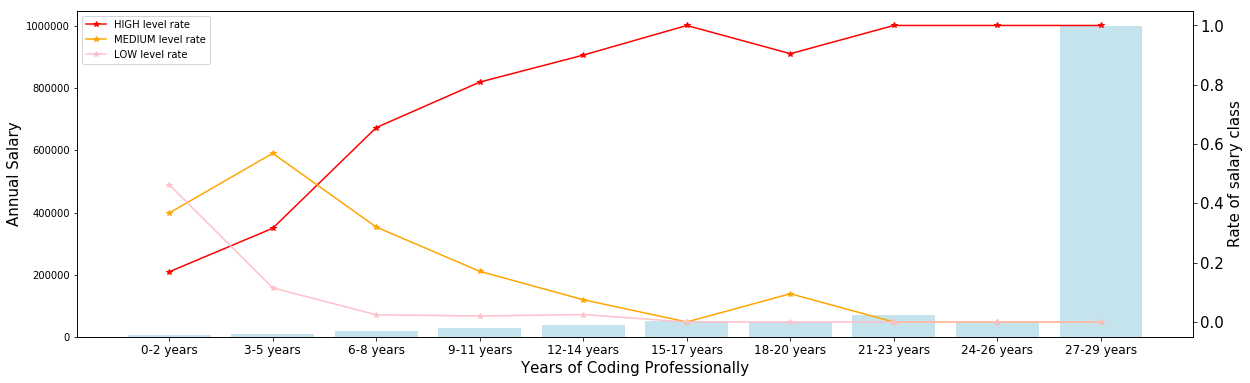

In [53]:
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(111)
ax1.bar(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['ConvertedSalary'],alpha=.7,color='lightblue')
ax1.set_ylabel('Annual Salary',fontsize='15') 
plt.yticks(fontsize=10)
plt.xticks(fontsize=12)
ax1.set_xlabel('Years of Coding Professionally',fontsize='15')


ax2 = ax1.twinx()
ax2.plot(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['HIGH_rate'], color='red', marker='*', label='HIGH level rate')
ax2.plot(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['MEDIUM_rate'],color='orange' , marker='*',label='MEDIUM level rate')
ax2.plot(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['LOW_rate'], color='pink', marker='*', label='LOW level rate')
plt.legend()

ax2.set_ylabel('Rate of salary class',fontsize='15')
plt.yticks(fontsize=15)

plt.show()

### China

In [54]:
def helper(x):
    if x == '0-2 years':
        return 0
    if x == '3-5 years':
        return 1
    if x == '6-8 years':
        return 2
    if x == '9-11 years':
        return 3
    if x == '12-14 years':
        return 4
    if x == '15-17 years':
        return 5
    if x == '18-20 years':
        return 6
    if x == '21-23 years':
        return 7
    if x == '24-26 years':
        return 8
    if x == '27-29 years':
        return 9
    if x == '30 or more years':
        return 10

salary_class_cnt = data_China_df.groupby(['YearsCodingProf','Salary_3_class'], as_index=False).count()[['ConvertedSalary','Salary_3_class','YearsCodingProf']]
salary_class_cnt['YearsLevel'] = salary_class_cnt['YearsCodingProf'].apply(helper)
salary_class_cnt = salary_class_cnt.sort_values(by = 'YearsLevel')
salary_class_cnt

,ConvertedSalary,Salary_3_class,YearsCodingProf,YearsLevel
0,8,HIGH,0-2 years,0
1,42,LOW,0-2 years,0
2,26,MEDIUM,0-2 years,0
12,47,MEDIUM,3-5 years,1
11,23,LOW,3-5 years,1
10,19,HIGH,3-5 years,1
15,18,MEDIUM,6-8 years,2
14,1,LOW,6-8 years,2
13,11,HIGH,6-8 years,2
16,16,HIGH,9-11 years,3


In [55]:
high = salary_class_cnt[salary_class_cnt['Salary_3_class'] == 'HIGH']['ConvertedSalary'].values
medium = salary_class_cnt[salary_class_cnt['Salary_3_class'] == 'MEDIUM']['ConvertedSalary'].values
low = salary_class_cnt[salary_class_cnt['Salary_3_class'] == 'LOW']['ConvertedSalary'].values
print(high)
print(medium)
print(low)

[ 8 19 11 16  7  3  1]
[26 47 18  4  2  2  1]
[42 23  1  2  1]


In [56]:
high = [8,19,11,16,7,3,1,0]
medium = [26,47,18,4,2,2,1,0]
low = [42,23,1,2,0,0,0,1]

YearsCodingProf_df = data_China_df.groupby('YearsCodingProf', as_index=False).median()
YearsCodingProf_df['YearsLevel'] = YearsCodingProf_df['YearsCodingProf'].apply(helper)
YearsCodingProf_df = YearsCodingProf_df.sort_values(by = 'YearsLevel')
YearsCodingProf_df['HIGH'] = high
YearsCodingProf_df['MEDIUM'] = medium
YearsCodingProf_df['LOW'] = low
YearsCodingProf_df['HIGH_rate'] = YearsCodingProf_df.apply(lambda x: x['HIGH']/(x['HIGH']+x['MEDIUM']+x['LOW']), axis = 1)
YearsCodingProf_df['MEDIUM_rate'] = YearsCodingProf_df.apply(lambda x: x['MEDIUM']/(x['HIGH']+x['MEDIUM']+x['LOW']), axis = 1)
YearsCodingProf_df['LOW_rate'] = YearsCodingProf_df.apply(lambda x: x['LOW']/(x['HIGH']+x['MEDIUM']+x['LOW']), axis = 1)
YearsCodingProf_df = YearsCodingProf_df.iloc[:-1,:]
YearsCodingProf_df 

,YearsCodingProf,ConvertedSalary,YearsLevel,HIGH,MEDIUM,LOW,HIGH_rate,MEDIUM_rate,LOW_rate
0,0-2 years,18696.0,0,8,26,42,0.105263,0.342105,0.552632
5,3-5 years,28050.0,1,19,47,23,0.213483,0.528090,0.258427
6,6-8 years,37404.0,2,11,18,1,0.366667,0.600000,0.033333
7,9-11 years,46751.0,3,16,4,2,0.727273,0.181818,0.090909
1,12-14 years,54542.0,4,7,2,0,0.777778,0.222222,0.000000
2,15-17 years,46752.0,5,3,2,0,0.600000,0.400000,0.000000
3,18-20 years,57660.5,6,1,1,0,0.500000,0.500000,0.000000


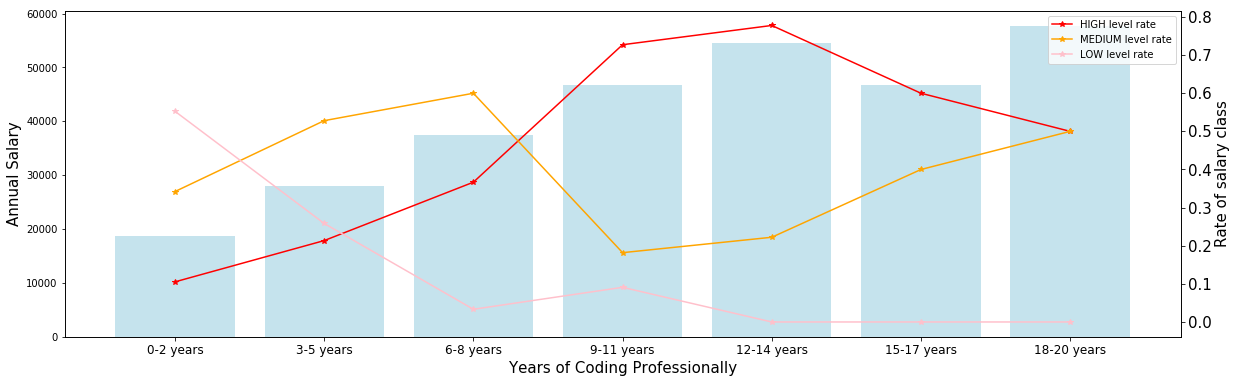

In [57]:
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(111)
ax1.bar(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['ConvertedSalary'],alpha=.7,color='lightblue')
ax1.set_ylabel('Annual Salary',fontsize='15') 
plt.yticks(fontsize=10)
plt.xticks(fontsize=12)
ax1.set_xlabel('Years of Coding Professionally',fontsize='15')


ax2 = ax1.twinx()
ax2.plot(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['HIGH_rate'], color='red', marker='*', label='HIGH level rate')
ax2.plot(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['MEDIUM_rate'],color='orange' , marker='*',label='MEDIUM level rate')
ax2.plot(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['LOW_rate'], color='pink', marker='*', label='LOW level rate')
plt.legend()

ax2.set_ylabel('Rate of salary class',fontsize='15')
plt.yticks(fontsize=15)

plt.show()

### Europe

In [58]:
def helper(x):
    if x == '0-2 years':
        return 0
    if x == '3-5 years':
        return 1
    if x == '6-8 years':
        return 2
    if x == '9-11 years':
        return 3
    if x == '12-14 years':
        return 4
    if x == '15-17 years':
        return 5
    if x == '18-20 years':
        return 6
    if x == '21-23 years':
        return 7
    if x == '24-26 years':
        return 8
    if x == '27-29 years':
        return 9
    if x == '30 or more years':
        return 10

salary_class_cnt = data_Europe_df.groupby(['YearsCodingProf','Salary_3_class']).count().reset_index()[['ConvertedSalary','Salary_3_class','YearsCodingProf']]
salary_class_cnt['YearsLevel'] = salary_class_cnt['YearsCodingProf'].apply(helper)
salary_class_cnt = salary_class_cnt.sort_values(by = 'YearsLevel')
high = salary_class_cnt[salary_class_cnt['Salary_3_class'] == 'HIGH']['ConvertedSalary'].values
medium = salary_class_cnt[salary_class_cnt['Salary_3_class'] == 'MEDIUM']['ConvertedSalary'].values
low = salary_class_cnt[salary_class_cnt['Salary_3_class'] == 'LOW']['ConvertedSalary'].values


YearsCodingProf_df = data_Europe_df.groupby('YearsCodingProf').median().reset_index()
YearsCodingProf_df['YearsLevel'] = YearsCodingProf_df['YearsCodingProf'].apply(helper)
YearsCodingProf_df = YearsCodingProf_df.sort_values(by = 'YearsLevel')
YearsCodingProf_df['HIGH'] = high
YearsCodingProf_df['MEDIUM'] = medium
YearsCodingProf_df['LOW'] = low
YearsCodingProf_df['HIGH_rate'] = YearsCodingProf_df.apply(lambda x: x['HIGH']/(x['HIGH']+x['MEDIUM']+x['LOW']), axis = 1)
YearsCodingProf_df['MEDIUM_rate'] = YearsCodingProf_df.apply(lambda x: x['MEDIUM']/(x['HIGH']+x['MEDIUM']+x['LOW']), axis = 1)
YearsCodingProf_df['LOW_rate'] = YearsCodingProf_df.apply(lambda x: x['LOW']/(x['HIGH']+x['MEDIUM']+x['LOW']), axis = 1)
YearsCodingProf_df

,YearsCodingProf,ConvertedSalary,YearsLevel,HIGH,MEDIUM,LOW,HIGH_rate,MEDIUM_rate,LOW_rate
0,0-2 years,35492.0,0,261,908,1673,0.091837,0.319493,0.588670
7,3-5 years,48616.0,1,837,1887,1471,0.199523,0.449821,0.350656
9,6-8 years,58746.0,2,863,1274,518,0.325047,0.479849,0.195104
10,9-11 years,65940.0,3,858,885,297,0.420588,0.433824,0.145588
1,12-14 years,70146.0,4,538,419,118,0.500465,0.389767,0.109767
2,15-17 years,73433.0,5,419,271,65,0.554967,0.358940,0.086093
3,18-20 years,74384.5,6,411,240,59,0.578873,0.338028,0.083099
4,21-23 years,82344.0,7,202,88,20,0.651613,0.283871,0.064516
5,24-26 years,88116.0,8,126,55,10,0.659686,0.287958,0.052356
6,27-29 years,85671.0,9,65,24,10,0.656566,0.242424,0.101010


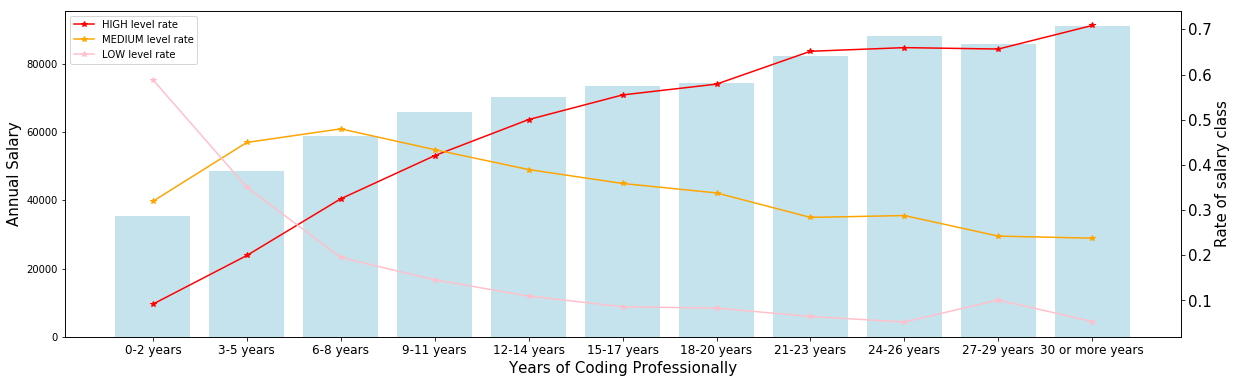

In [59]:
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(111)
ax1.bar(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['ConvertedSalary'],alpha=.7,color='lightblue')
ax1.set_ylabel('Annual Salary',fontsize='15') 
plt.yticks(fontsize=10)
plt.xticks(fontsize=12)
ax1.set_xlabel('Years of Coding Professionally',fontsize='15')


ax2 = ax1.twinx()
ax2.plot(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['HIGH_rate'], color='red', marker='*', label='HIGH level rate')
ax2.plot(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['MEDIUM_rate'],color='orange' , marker='*',label='MEDIUM level rate')
ax2.plot(YearsCodingProf_df['YearsCodingProf'], YearsCodingProf_df['LOW_rate'], color='pink', marker='*', label='LOW level rate')
plt.legend()

ax2.set_ylabel('Rate of salary class',fontsize='15')
plt.yticks(fontsize=15)

plt.show()

## CompanySize

In [60]:
data_df['CompanySize'].unique()

array(['10,000 or more employees', '10 to 19 employees',
       '100 to 499 employees', '1,000 to 4,999 employees',
       '20 to 99 employees', '500 to 999 employees',
       '5,000 to 9,999 employees', 'Fewer than 10 employees', nan],
      dtype=object)

In [61]:
tmp_median = data_df.groupby('CompanySize',as_index=False).median().rename(columns={"CompanySize": "CompanySize", "ConvertedSalary": "median"})
tmp_median

,CompanySize,median
0,"1,000 to 4,999 employees",66084.0
1,10 to 19 employees,46507.0
2,"10,000 or more employees",79552.0
3,100 to 499 employees,61194.0
4,20 to 99 employees,54340.0
5,"5,000 to 9,999 employees",65000.0
6,500 to 999 employees,65000.0
7,Fewer than 10 employees,44064.0


In [62]:
tmp_mean = data_df.groupby('CompanySize',as_index=False).mean().rename(columns={"CompanySize": "CompanySize", "ConvertedSalary": "mean"})
tmp_mean

,CompanySize,mean
0,"1,000 to 4,999 employees",107579.136343
1,10 to 19 employees,86993.855473
2,"10,000 or more employees",132929.114286
3,100 to 499 employees,98386.424981
4,20 to 99 employees,91191.618965
5,"5,000 to 9,999 employees",107146.531306
6,500 to 999 employees,105683.530763
7,Fewer than 10 employees,84306.227102


In [63]:
CompanySize_df = tmp_mean.join(tmp_median.set_index('CompanySize'), on = 'CompanySize')

In [64]:
def helper(x):
    if x == 'Fewer than 10 employees':
        return 0
    if x == '10 to 19 employees':
        return 1
    if x == '20 to 99 employees':
        return 2
    if x == '100 to 499 employees':
        return 3
    if x == '500 to 999 employees':
        return 4
    if x == '1,000 to 4,999 employees':
        return 5
    if x == '5,000 to 9,999 employees':
        return 6
    if x == '10,000 or more employees':
        return 7
CompanySize_df['level'] = CompanySize_df['CompanySize'].apply(helper)
CompanySize_df = CompanySize_df.sort_values(by = 'level')
CompanySize_df

,CompanySize,mean,median,level
7,Fewer than 10 employees,84306.227102,44064.0,0
1,10 to 19 employees,86993.855473,46507.0,1
4,20 to 99 employees,91191.618965,54340.0,2
3,100 to 499 employees,98386.424981,61194.0,3
6,500 to 999 employees,105683.530763,65000.0,4
0,"1,000 to 4,999 employees",107579.136343,66084.0,5
5,"5,000 to 9,999 employees",107146.531306,65000.0,6
2,"10,000 or more employees",132929.114286,79552.0,7


In [65]:
fig = plt.figure(figsize=(20, 6))`

plt.plot(CompanySize_df['CompanySize'], CompanySize_df['mean'], color='red', marker='*', label='Mean of salary')
plt.plot(CompanySize_df['CompanySize'], CompanySize_df['median'],color='orange' , marker='*',label='Median of salary')
plt.legend()
plt.ylabel('Salary')
plt.xlabel("Salary with company size")
plt.show()

SyntaxError: invalid syntax (<ipython-input-65-70a303b2bdeb>, line 1)

### USA Canada

In [ ]:
tmp_median = data_US_CA_df.groupby('CompanySize',as_index=False).median().rename(columns={"CompanySize": "CompanySize", "ConvertedSalary": "median"})
tmp_mean = data_US_CA_df.groupby('CompanySize',as_index=False).mean().rename(columns={"CompanySize": "CompanySize", "ConvertedSalary": "mean"})
tmp_mean
CompanySize_df = tmp_mean.join(tmp_median.set_index('CompanySize'), on = 'CompanySize')
def helper(x):
    if x == 'Fewer than 10 employees':
        return 0
    if x == '10 to 19 employees':
        return 1
    if x == '20 to 99 employees':
        return 2
    if x == '100 to 499 employees':
        return 3
    if x == '500 to 999 employees':
        return 4
    if x == '1,000 to 4,999 employees':
        return 5
    if x == '5,000 to 9,999 employees':
        return 6
    if x == '10,000 or more employees':
        return 7
CompanySize_df['level'] = CompanySize_df['CompanySize'].apply(helper)
CompanySize_df = CompanySize_df.sort_values(by = 'level')
CompanySize_df

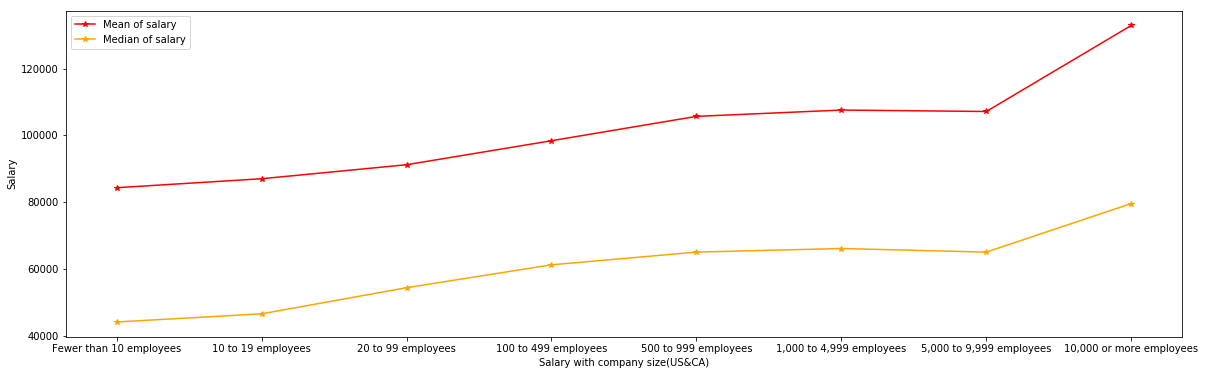

In [66]:
fig = plt.figure(figsize=(20, 6))

plt.plot(CompanySize_df['CompanySize'], CompanySize_df['mean'], color='red', marker='*', label='Mean of salary')
plt.plot(CompanySize_df['CompanySize'], CompanySize_df['median'],color='orange' , marker='*',label='Median of salary')
plt.legend()
plt.ylabel('Salary')
plt.xlabel("Salary with company size(US&CA)")
plt.show()

### India

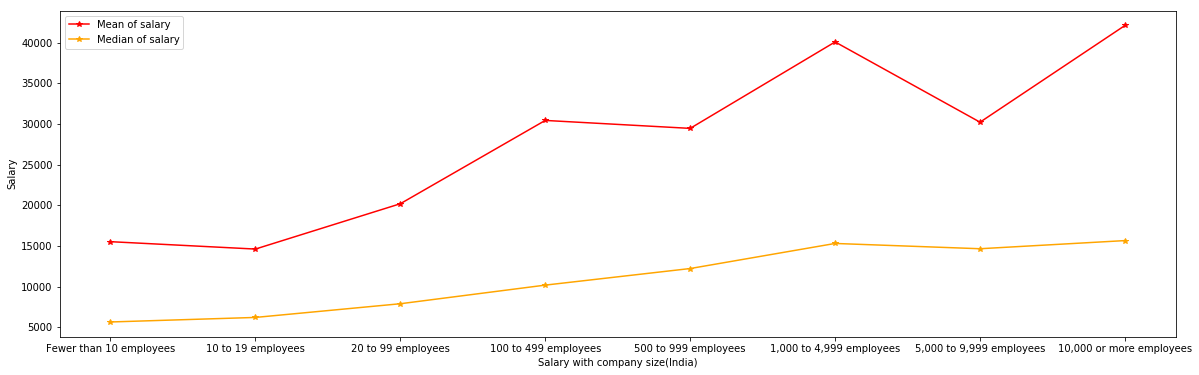

In [67]:
tmp_median = data_India_df.groupby('CompanySize',as_index=False).median().rename(columns={"CompanySize": "CompanySize", "ConvertedSalary": "median"})
tmp_mean = data_India_df.groupby('CompanySize',as_index=False).mean().rename(columns={"CompanySize": "CompanySize", "ConvertedSalary": "mean"})
tmp_mean
CompanySize_df = tmp_mean.join(tmp_median.set_index('CompanySize'), on = 'CompanySize')
def helper(x):
    if x == 'Fewer than 10 employees':
        return 0
    if x == '10 to 19 employees':
        return 1
    if x == '20 to 99 employees':
        return 2
    if x == '100 to 499 employees':
        return 3
    if x == '500 to 999 employees':
        return 4
    if x == '1,000 to 4,999 employees':
        return 5
    if x == '5,000 to 9,999 employees':
        return 6
    if x == '10,000 or more employees':
        return 7
CompanySize_df['level'] = CompanySize_df['CompanySize'].apply(helper)
CompanySize_df = CompanySize_df.sort_values(by = 'level')

fig = plt.figure(figsize=(20, 6))

plt.plot(CompanySize_df['CompanySize'], CompanySize_df['mean'], color='red', marker='*', label='Mean of salary')
plt.plot(CompanySize_df['CompanySize'], CompanySize_df['median'],color='orange' , marker='*',label='Median of salary')
plt.legend()
plt.ylabel('Salary')
plt.xlabel("Salary with company size(India)")
plt.show()

### China

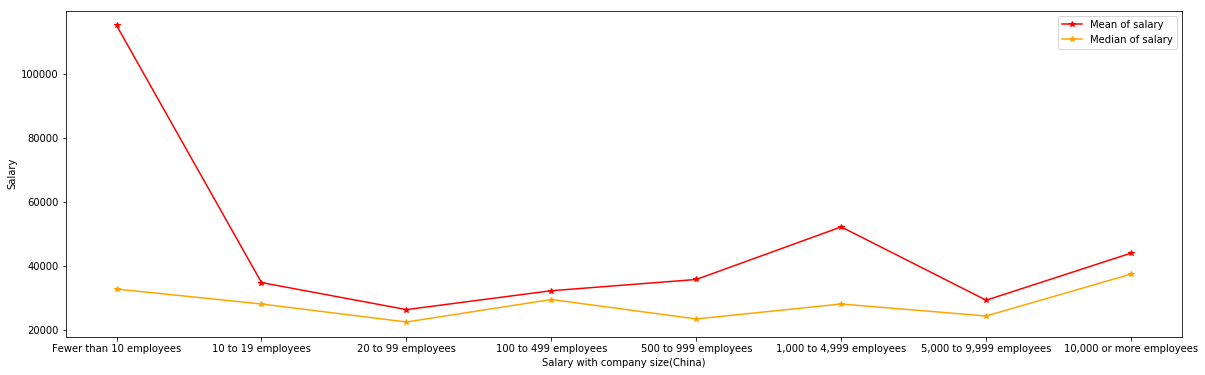

In [68]:
tmp_median = data_China_df.groupby('CompanySize',as_index=False).median().rename(columns={"CompanySize": "CompanySize", "ConvertedSalary": "median"})
tmp_mean = data_China_df.groupby('CompanySize',as_index=False).mean().rename(columns={"CompanySize": "CompanySize", "ConvertedSalary": "mean"})
tmp_mean
CompanySize_df = tmp_mean.join(tmp_median.set_index('CompanySize'), on = 'CompanySize')
def helper(x):
    if x == 'Fewer than 10 employees':
        return 0
    if x == '10 to 19 employees':
        return 1
    if x == '20 to 99 employees':
        return 2
    if x == '100 to 499 employees':
        return 3
    if x == '500 to 999 employees':
        return 4
    if x == '1,000 to 4,999 employees':
        return 5
    if x == '5,000 to 9,999 employees':
        return 6
    if x == '10,000 or more employees':
        return 7
CompanySize_df['level'] = CompanySize_df['CompanySize'].apply(helper)
CompanySize_df = CompanySize_df.sort_values(by = 'level')

fig = plt.figure(figsize=(20, 6))

plt.plot(CompanySize_df['CompanySize'], CompanySize_df['mean'], color='red', marker='*', label='Mean of salary')
plt.plot(CompanySize_df['CompanySize'], CompanySize_df['median'],color='orange' , marker='*',label='Median of salary')
plt.legend()
plt.ylabel('Salary')
plt.xlabel("Salary with company size(China)")
plt.show()

### Europe

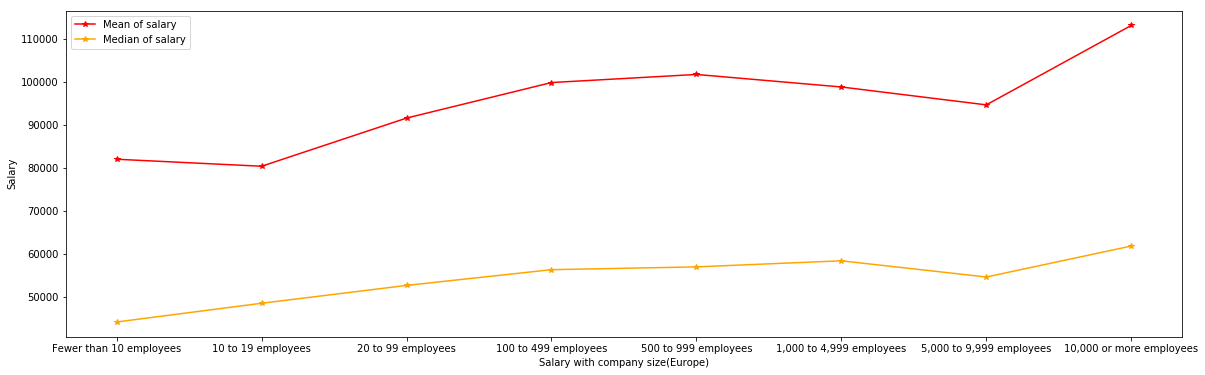

In [69]:
tmp_median = data_Europe_df.groupby('CompanySize',as_index=False).median().rename(columns={"CompanySize": "CompanySize", "ConvertedSalary": "median"})
tmp_mean = data_Europe_df.groupby('CompanySize',as_index=False).mean().rename(columns={"CompanySize": "CompanySize", "ConvertedSalary": "mean"})
tmp_mean
CompanySize_df = tmp_mean.join(tmp_median.set_index('CompanySize'), on = 'CompanySize')
def helper(x):
    if x == 'Fewer than 10 employees':
        return 0
    if x == '10 to 19 employees':
        return 1
    if x == '20 to 99 employees':
        return 2
    if x == '100 to 499 employees':
        return 3
    if x == '500 to 999 employees':
        return 4
    if x == '1,000 to 4,999 employees':
        return 5
    if x == '5,000 to 9,999 employees':
        return 6
    if x == '10,000 or more employees':
        return 7
CompanySize_df['level'] = CompanySize_df['CompanySize'].apply(helper)
CompanySize_df = CompanySize_df.sort_values(by = 'level')

fig = plt.figure(figsize=(20, 6))

plt.plot(CompanySize_df['CompanySize'], CompanySize_df['mean'], color='red', marker='*', label='Mean of salary')
plt.plot(CompanySize_df['CompanySize'], CompanySize_df['median'],color='orange' , marker='*',label='Median of salary')
plt.legend()
plt.ylabel('Salary')
plt.xlabel("Salary with company size(Europe)")
plt.show()

## OpenSource

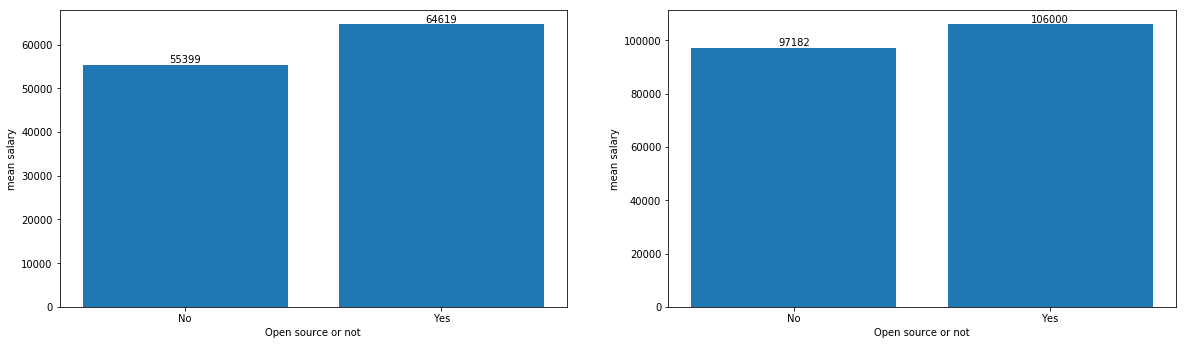

In [70]:
median = data_df.groupby('OpenSource',as_index=False).median()
mean = data_df.groupby('OpenSource',as_index=False).mean()

fig = plt.figure(figsize=(20, 12))

plt.subplot(221)
x, y = median['OpenSource'], median['ConvertedSalary']
plt.bar(x, y)
for a,b in zip(x, y):
    plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.ylabel('mean salary')
plt.xlabel('Open source or not')

    
plt.subplot(222)
x, y = mean['OpenSource'], mean['ConvertedSalary']
plt.bar(x, y)
for a,b in zip(x, y):
    plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.ylabel('mean salary')
plt.xlabel('Open source or not')    
plt.show()

### US CA

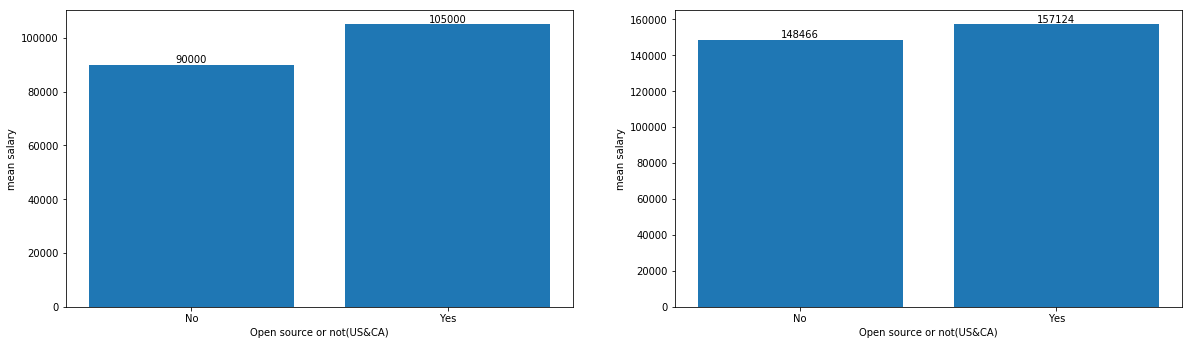

In [71]:
median = data_US_CA_df.groupby('OpenSource',as_index=False).median()
mean = data_US_CA_df.groupby('OpenSource',as_index=False).mean()

fig = plt.figure(figsize=(20, 12))

plt.subplot(221)
x, y = median['OpenSource'], median['ConvertedSalary']
plt.bar(x, y)
for a,b in zip(x, y):
    plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.ylabel('mean salary')
plt.xlabel('Open source or not(US&CA)')

    
plt.subplot(222)
x, y = mean['OpenSource'], mean['ConvertedSalary']
plt.bar(x, y)
for a,b in zip(x, y):
    plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.ylabel('mean salary')
plt.xlabel('Open source or not(US&CA)')    
plt.show()

### India

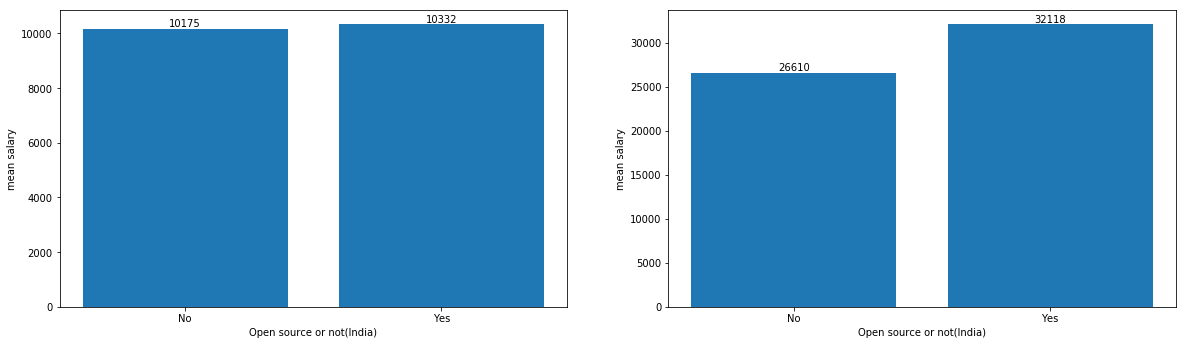

In [72]:
median = data_India_df.groupby('OpenSource',as_index=False).median()
mean = data_India_df.groupby('OpenSource',as_index=False).mean()

fig = plt.figure(figsize=(20, 12))

plt.subplot(221)
x, y = median['OpenSource'], median['ConvertedSalary']
plt.bar(x, y)
for a,b in zip(x, y):
    plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.ylabel('mean salary')
plt.xlabel('Open source or not(India)')

    
plt.subplot(222)
x, y = mean['OpenSource'], mean['ConvertedSalary']
plt.bar(x, y)
for a,b in zip(x, y):
    plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.ylabel('mean salary')
plt.xlabel('Open source or not(India)')    
plt.show()

### China 

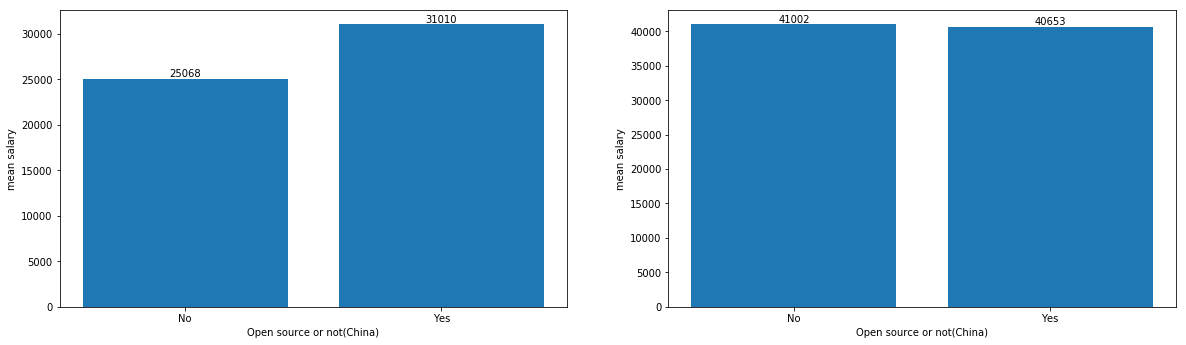

In [73]:
median = data_China_df.groupby('OpenSource',as_index=False).median()
mean = data_China_df.groupby('OpenSource',as_index=False).mean()

fig = plt.figure(figsize=(20, 12))

plt.subplot(221)
x, y = median['OpenSource'], median['ConvertedSalary']
plt.bar(x, y)
for a,b in zip(x, y):
    plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.ylabel('mean salary')
plt.xlabel('Open source or not(China)')

    
plt.subplot(222)
x, y = mean['OpenSource'], mean['ConvertedSalary']
plt.bar(x, y)
for a,b in zip(x, y):
    plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.ylabel('mean salary')
plt.xlabel('Open source or not(China)')    
plt.show()

### Europe

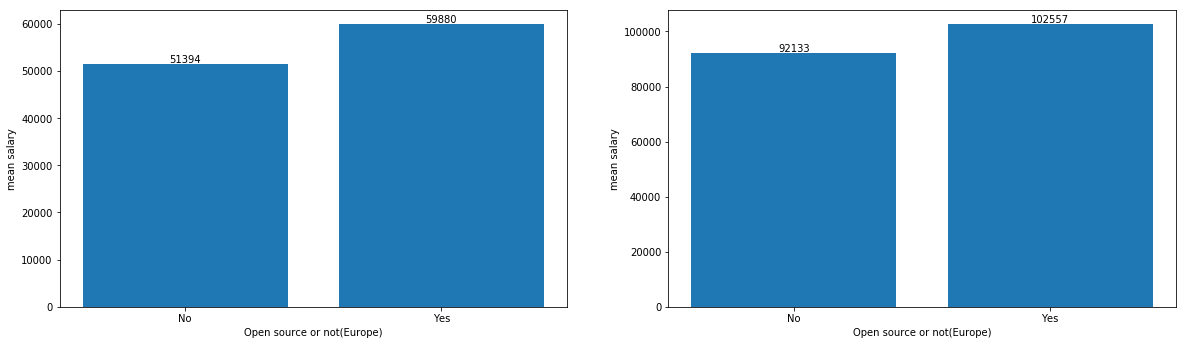

In [74]:
median = data_Europe_df.groupby('OpenSource',as_index=False).median()
mean = data_Europe_df.groupby('OpenSource',as_index=False).mean()

fig = plt.figure(figsize=(20, 12))

plt.subplot(221)
x, y = median['OpenSource'], median['ConvertedSalary']
plt.bar(x, y)
for a,b in zip(x, y):
    plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.ylabel('mean salary')
plt.xlabel('Open source or not(Europe)')

    
plt.subplot(222)
x, y = mean['OpenSource'], mean['ConvertedSalary']
plt.bar(x, y)
for a,b in zip(x, y):
    plt.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.ylabel('mean salary')
plt.xlabel('Open source or not(Europe)')    
plt.show()

## FormalEducation

In [75]:
data_df['FormalEducation'].unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Associate degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D, Ed.D., etc.)', nan,
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [76]:
data_df['FormalEducation'].value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              21329
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           10631
Some college/university study without earning a degree                                 5238
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2040
Associate degree                                                                       1357
Other doctoral degree (Ph.D, Ed.D., etc.)                                              1140
Professional degree (JD, MD, etc.)                                                      562
Primary/elementary school                                                               200
I never completed any formal education                                                  139
Name: FormalEducation, dtype: int64

In [77]:
tmp_median = data_df.groupby('FormalEducation',as_index=False).median().rename(columns={"FormalEducation": "FormalEducation", "ConvertedSalary": "median"})
tmp_mean = data_df.groupby('FormalEducation',as_index=False).mean().rename(columns={"FormalEducation": "FormalEducation", "ConvertedSalary": "mean"})

FormalEducation_df = tmp_mean.join(tmp_median.set_index('FormalEducation'), on = 'FormalEducation')

def helper(x):
    if x == 'I never completed any formal education':
        return 0
    if x == 'Primary/elementary school':
        return 1
    if x == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':
        return 2
    if x == 'Associate degree':
        return 3
    if x == 'Some college/university study without earning a degree':
        return 4
    if x == 'Bachelor’s degree (BA, BS, B.Eng., etc.)':
        return 5
    if x == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)':
        return 6
    if x == 'Other doctoral degree (Ph.D, Ed.D., etc.)':
        return 7
    if x == 'Professional degree (JD, MD, etc.)':
        return 8
FormalEducation_df['level'] = FormalEducation_df['FormalEducation'].apply(helper)
FormalEducation_df = FormalEducation_df.sort_values(by = 'level')
FormalEducation_df

,FormalEducation,mean,median,level
2,I never completed any formal education,157425.812950,58752.0,0
5,Primary/elementary school,94450.285000,42270.0,1
7,"Secondary school (e.g. American high school, G...",88949.698529,44062.0,2
0,Associate degree,105836.509948,58392.0,3
8,Some college/university study without earning ...,100121.655976,55562.0,4
1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",100356.581649,61194.0,5
3,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",102746.015333,61194.0,6
4,"Other doctoral degree (Ph.D, Ed.D., etc.)",130380.476316,80000.0,7
6,"Professional degree (JD, MD, etc.)",72751.935943,32292.0,8


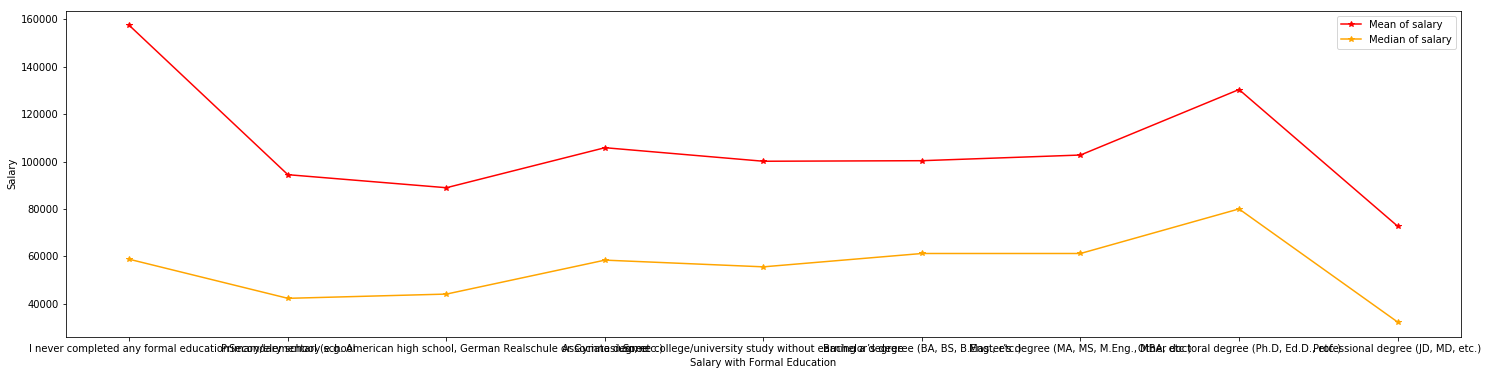

In [78]:
fig = plt.figure(figsize=(25, 6))

plt.plot(FormalEducation_df['FormalEducation'], FormalEducation_df['mean'], color='red', marker='*', label='Mean of salary')
plt.plot(FormalEducation_df['FormalEducation'], FormalEducation_df['median'],color='orange' , marker='*',label='Median of salary')
plt.legend()
plt.ylabel('Salary')
plt.xlabel("Salary with Formal Education")
plt.show()

## LanguageWorkedWith

In [79]:
data_copy = data_df.copy()

In [80]:
data_copy = data_copy.drop('LanguageWorkedWith', axis=1).join(data_copy['LanguageWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('LanguageWorkedWith'))
data_copy

,Employment,YearsCodingProf,DevType,CompanySize,OpenSource,Country,FormalEducation,ConvertedSalary,Salary_3_class,LanguageWorkedWith
1,Employed full-time,18-20 years,Database administrator;DevOps specialist;Full-...,"10,000 or more employees",Yes,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",70841.0,MEDIUM,JavaScript
1,Employed full-time,18-20 years,Database administrator;DevOps specialist;Full-...,"10,000 or more employees",Yes,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",70841.0,MEDIUM,Python
1,Employed full-time,18-20 years,Database administrator;DevOps specialist;Full-...,"10,000 or more employees",Yes,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)",70841.0,MEDIUM,Bash/Shell
4,Employed full-time,0-2 years,Data or business analyst;Desktop or enterprise...,"10,000 or more employees",No,South Africa,Some college/university study without earning ...,21426.0,LOW,C
4,Employed full-time,0-2 years,Data or business analyst;Desktop or enterprise...,"10,000 or more employees",No,South Africa,Some college/university study without earning ...,21426.0,LOW,C++
...,...,...,...,...,...,...,...,...,...,...
89839,"Independent contractor, freelancer, or self-em...",NaN,Back-end developer;Student,NaN,No,France,"Secondary school (e.g. American high school, G...",96000.0,MEDIUM,Bash/Shell
89888,"Independent contractor, freelancer, or self-em...",NaN,Designer;Student,NaN,Yes,India,"Secondary school (e.g. American high school, G...",800.0,LOW,C
89888,"Independent contractor, freelancer, or self-em...",NaN,Designer;Student,NaN,Yes,India,"Secondary school (e.g. American high school, G...",800.0,LOW,C++
89888,"Independent contractor, freelancer, or self-em...",NaN,Designer;Student,NaN,Yes,India,"Secondary school (e.g. American high school, G...",800.0,LOW,HTML


In [83]:
tmp = data_copy.groupby('LanguageWorkedWith',as_index=False).median().sort_values(by='ConvertedSalary')
tmp

,LanguageWorkedWith,ConvertedSalary
25,PHP,46507.0
37,Visual Basic 6,50000.0
9,Delphi/Object Pascal,51403.0
22,Matlab,51983.0
0,Assembly,54106.0
35,VB.NET,55075.0
2,C,56145.0
17,Java,56148.0
36,VBA,58545.0
5,CSS,58752.0


In [117]:
text = ";".join((tmp['LanguageWorkedWith']+";")*tmp['ConvertedSalary'].astype(int))

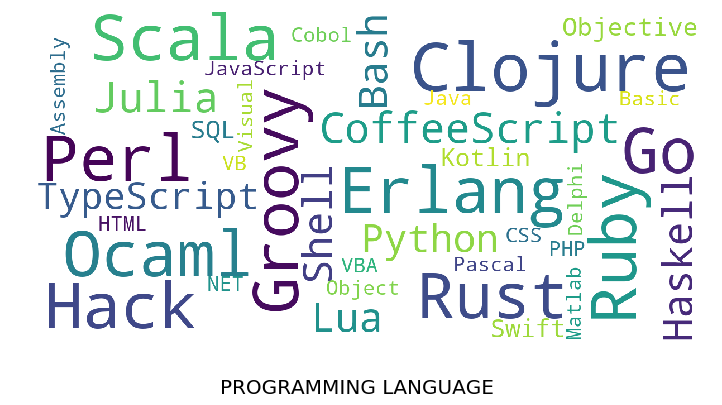

In [121]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=250,
        max_font_size=40, 
        scale=3,
        random_state=1,
        collocations=False
    ).generate(data)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(text,'PROGRAMMING LANGUAGE')